<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Index.ipynb" target="_self"> <h2> &uarr; Back to front page</h2></a>
    </div>
  </div>
</nav>

# Processing audio signals

Now that we have familiarized ourselves with the main components of an audio signal, it is time to explore some simple audio manipulation. Once again, we start by loading the contents of the audio file `sample_music.wav` using scipy.

In [204]:
import scipy.io.wavfile as wavfile # Import module for handling of .wav audio files
from IPython.display import Audio   # For loading embedded audio player
import numpy as np

fs, sampleData = wavfile.read("sample_audio.wav") # "fs" is sampling frequency, "sampleData" is the sequence of measurements
print("Data type in raw sample data: ", type(sampleData[0]))

Data type in raw sample data:  <class 'numpy.int16'>


Processing audio typically involves subjecting the signal samples to som mathematical operation. However, it is important to note that each value in the `sampleData` array is of type `int16`, which is the standard sample resolution for audio recordings. When attempting to manipulate audio samples this may result in some severe pitfalls which can be demonstrated when attempting to scale up the values in `sampleData`.

## a)

Create a figure which shows a plot of both `sampleData` and `2*sampleData`, [here](Figures/audio_processing.png) is a example of what this plot should look like. Give a thorough explanation of why the plot for `sampleData*2` is so evidently clipped compared to `sampleData`. 

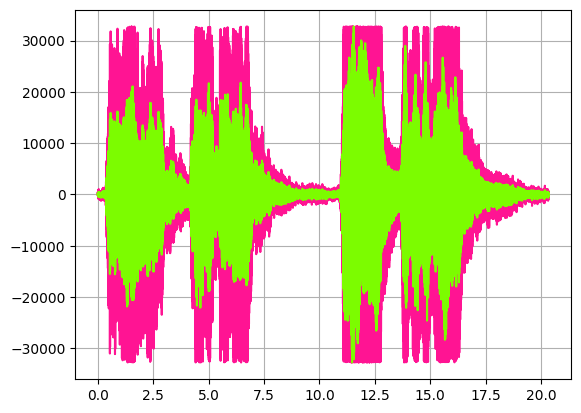

In [222]:
x = np.arange(0,len(sampleData),1)
customX = np.linspace(0,(len(sampleData)*1/fs),num=len(sampleData))

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(customX, sampleData*2, color="deeppink")
ax.plot(customX, (sampleData), color="lawngreen")
ax.grid()
plt.show()


ANSWER THEORY QUESTIONS HERE:
The $sampleData \cdot 2$ is clipped due maxing the size the 16bits

In order to avoid the issues explored in problem **a)** when processing these samples, it is usually preferable to convert the samples to floating point values (`float`). For instance, the line 
```python
xn = sampleData/max(abs(sampleData))
```
accomplishes this by using normal division to create a new array `xn` where the sample values are floating point values. In addition the range of values in the signal is scaled down to $-1.0 \leq x[n] \leq 1.0$. 

In [218]:
xn = sampleData/max(abs(sampleData))
print("Data type in scaled array 'xn': ", type(xn[0]))

Data type in scaled array 'xn':  <class 'numpy.float64'>


We are now ready to begin adding sound effects to our music sample. One of the most useful tools available to us when modifying entire arrays is [slicing](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp), as it allows us to acces ond/or overwrite a subset of the elements in our array.


## b)

Use list slicing to reduce the amplitude of the first $10$ seconds of the audio recording. The resulting audio output $y(t)$ may be described in relation to the original audio signal $x(t)$ using the follwoing equation. 

$$y(t) = 
\begin{cases}
\frac{1}{8}\cdot x(t), & t\leq 10s \\
x(t), & t > 10s
\end{cases}
$$



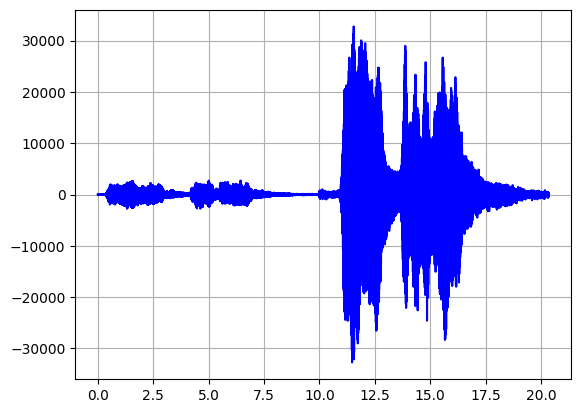

In [217]:
index = np.argmin(np.abs(customX - 10.0))
yn = sampleData.copy()
yn[:index+1]= yn[:index+1]*(1/8) 

fig, ax = plt.subplots()
ax.plot(customX, yn, color="b")
ax.grid()
plt.show()

You can use the code below to listen to the new modified audio signal in the array `yn`. Describe what you hear.

ANSWER THEORY QUESTIONS HERE: The first 10 seconds are much lowe

In [208]:
# Use the following lines to listen to the audio signal `yn`
Audio(np.int16(yn*0x7FFF), rate=fs)

The audio signal in `sample_audio.wav` is what known as a *mono* signal, meaning it has only one channel. When played on a speaker system with two speakers (which is quite common), the exact same audio output will play from each of the speakers. *Stereo* audio signals are generally much more common, as having one dedicated audio stream for left and right speaker allows for more spatial depth in the listening experience. In Python, stereo signals can be represented using a $2\times N$ 2-dimensional array. Given an audio signal consisting of the left speaker audio stream $x_{left}[n]$ and the right speaker audio stream $x_{right}[n]$, the resulting 2D array should adhere to the following pattern:

<img src="Figures/stereo_audio.png" style="width: 800px; margin-left: 100px" />

What we wish to do is modify our `sample_aduio.wav` signal in such a way that the first $10$ seconds of our audio stream sound like they originates on the left side of the listener, and the rest of the audio stream sounds like it originates to the right of the listener. This can be done by alternately reducing the amplitude of each audio channel.

Let's call our stereo audio signal $v_m(t)$, where $m$ is channel and $t$ i is time in seconds. Given a source single-channel audio $x(t)$ can then describe the stereo signal as follows:

$$v_m(t) = 
\begin{cases}
x(t), & t\leq 10s \text{ and } m=0\\
\frac{1}{8}\cdot x(t), & t > 10s \text{ and } m=0\\
\frac{1}{8}\cdot x(t), & t\leq 10s \text{ and } m=1\\
x(t), & t > 10s \text{ and } m=1
\end{cases}
$$

## c)
Create a stereo signal `v` which adheres to the specifications described above.

*P.S. Given two one-dimensional arrays `x1` and `x2` of equal length $N$, these can be combined into a $2\times N$ matrix `X` using [`numpy.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) as follows:*
```Python
X = np.concatenate(([x1], [x2]), axis=0)
```

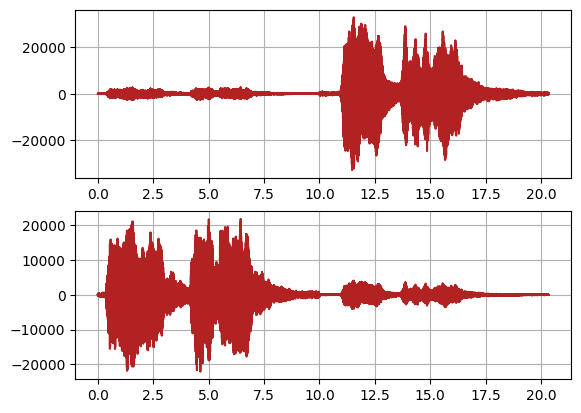

In [237]:
yn2 = sampleData.copy()
yn2[index:] = yn2[index:] * 1/8

v = np.concatenate((yn, yn2),axis=0)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(customX, yn, color="firebrick")
ax1.grid()
ax2.plot(customX, yn2, color="firebrick")
ax2.grid()
plt.show()


Use the following code cell to listen to the audio signal `v`, and verify the spatial properties of the signal.

In [238]:
# Use the following lines to listen to the audio signal `v`
Audio(np.int16(v/max(abs(v))*0x7FFF), rate=fs)

<br>
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
      <a class="navbar-brand" href="1_the_audio_file.ipynb" target="_self">&lt; Previous page: <i>Exploring the audio file</i></a>
      </div>
    <div class="navbar-header" style="float: right">
      <a class="navbar-brand" href="3_sinusoids.ipynb" target="_self">Next page: <i>Sinusoids and their frequency representation</i> &gt;</a>
    </div>
  </div>
</nav>